In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [1]:
# Load the dataset
file_path = "advertising.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
# The dataset contains four columns:

# TV: Money spent on TV advertising.
# Radio: Money spent on Radio advertising.
# Newspaper: Money spent on Newspaper advertising.
# Sales: The resulting sales figures.

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Summary Statistics

In [4]:
summary_stats = data.describe()

In [5]:
summary_stats

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Average spending on TV ads is 147.04 with a standard deviation of 85.85.
# Radio ad spending averages 23.26 with a standard deviation of 14.85.
# Newspaper ads average 30.55, exhibiting greater variability with a standard deviation of 21.78.
# Sales have a mean of 15.13 units with a spread of 5.28 units.

### Histogram for each variable

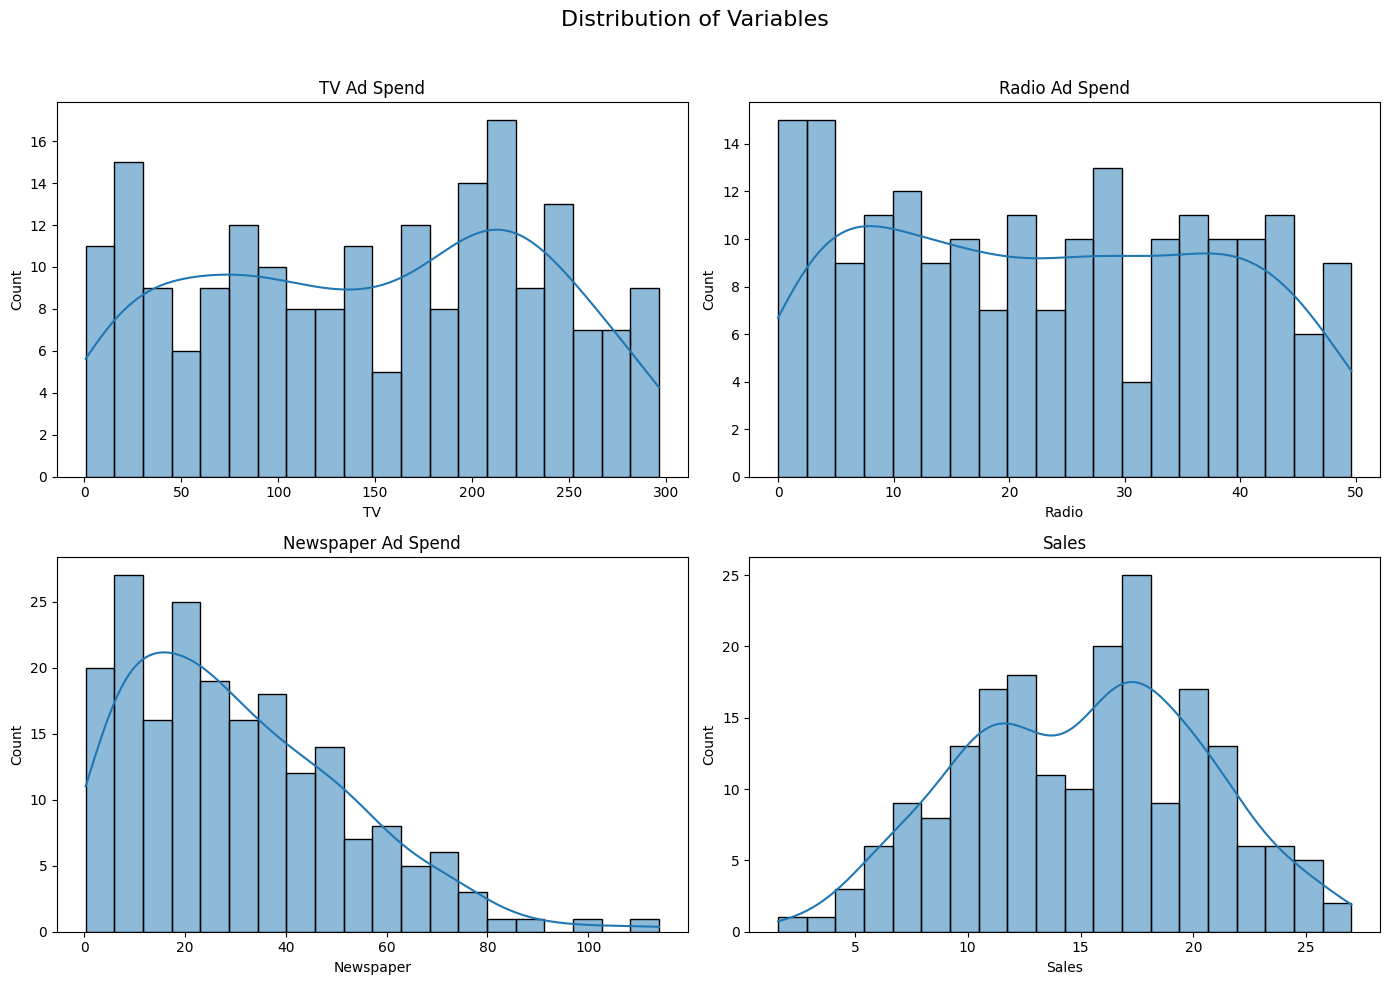

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Variables', fontsize=16)

sns.histplot(data['TV'], bins=20, kde=True, ax=axes[0, 0]).set_title('TV Ad Spend')
sns.histplot(data['Radio'], bins=20, kde=True, ax=axes[0, 1]).set_title('Radio Ad Spend')
sns.histplot(data['Newspaper'], bins=20, kde=True, ax=axes[1, 0]).set_title('Newspaper Ad Spend')
sns.histplot(data['Sales'], bins=20, kde=True, ax=axes[1, 1]).set_title('Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])

In [14]:
# TV ad spending follows a relatively uniform distribution, though with some peaks 
# near higher spending.
# Radio ad spend distribution is more centered, with a significant number of data 
# points around the mean (23.26).
# Newspaper ad spending has a wider spread, indicating varied usage across campaigns.
# Sales are skewed slightly to the right, suggesting that most campaigns result in 
# lower-to-moderate sales, with fewer cases of very high sales.

### Correlation Analysis

In [15]:
# 2. Correlation Analysis
correlation_matrix = data.corr()

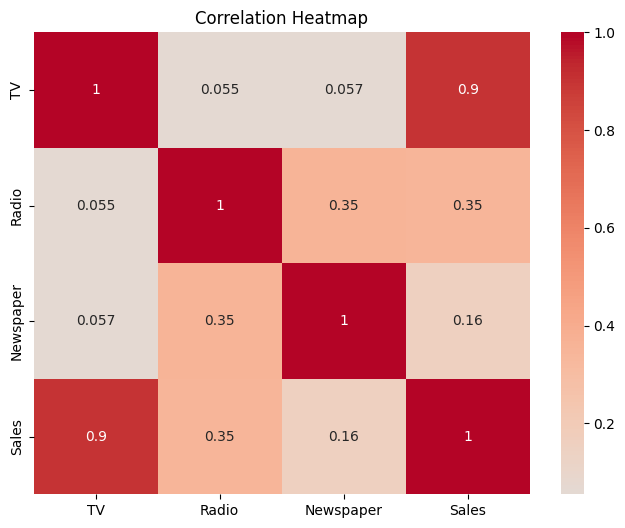

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# Show the outputs
plt.show()

In [17]:
# TV and Sales have a strong positive correlation (0.901), indicating that spending 
# on TV ads has a high impact on sales.
# Radio and Sales show a weaker correlation (0.35), suggesting a moderate influence.
# Newspaper and Sales have a low correlation (0.16), implying that newspaper spending 
# might have a limited or less direct effect on sales.
# There's minimal correlation between TV, Radio, and Newspaper spending, indicating 
# the spending patterns are relatively independent.

### Scatter plots to explore relationships between advertising platforms and sales

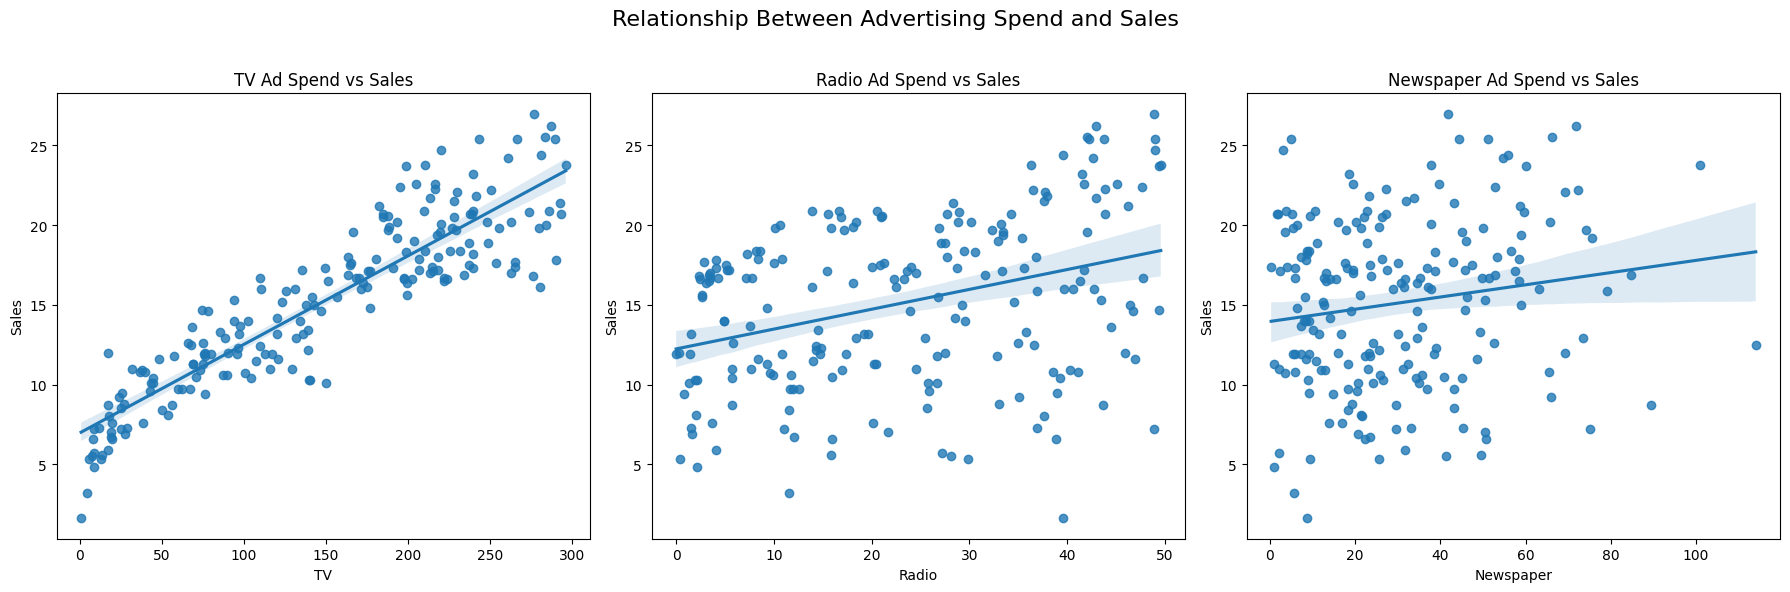

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relationship Between Advertising Spend and Sales', fontsize=16)

# Scatter plot for TV vs Sales
sns.regplot(data=data, x='TV', y='Sales', ax=axes[0])
axes[0].set_title('TV Ad Spend vs Sales')

# Scatter plot for Radio vs Sales
sns.regplot(data=data, x='Radio', y='Sales', ax=axes[1])
axes[1].set_title('Radio Ad Spend vs Sales')

# Scatter plot for Newspaper vs Sales
sns.regplot(data=data, x='Newspaper', y='Sales', ax=axes[2])
axes[2].set_title('Newspaper Ad Spend vs Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [19]:
# TV Ad Spend vs Sales:
# There is a clear positive linear relationship between TV spending and sales, 
# reinforcing the strong correlation seen earlier.
# As spending on TV ads increases, sales also tend to rise, suggesting that TV 
# campaigns have a significant impact on sales.
# Radio Ad Spend vs Sales:
# While there is a positive trend, it is less pronounced. Some scatter is visible,
# meaning radio advertising influences sales but with more variability.
# This variability may suggest that radio ads are effective in some cases but not 
# consistently across all campaigns.
# Newspaper Ad Spend vs Sales:
# The scatter plot shows little to no clear pattern between newspaper ad spending 
# and sales.
# This aligns with the low correlation observed in the heatmap, indicating that 
# increasing newspaper spending doesn't significantly improve sales outcomes.

### Boxplots to detect outliers and variability in spending and sales

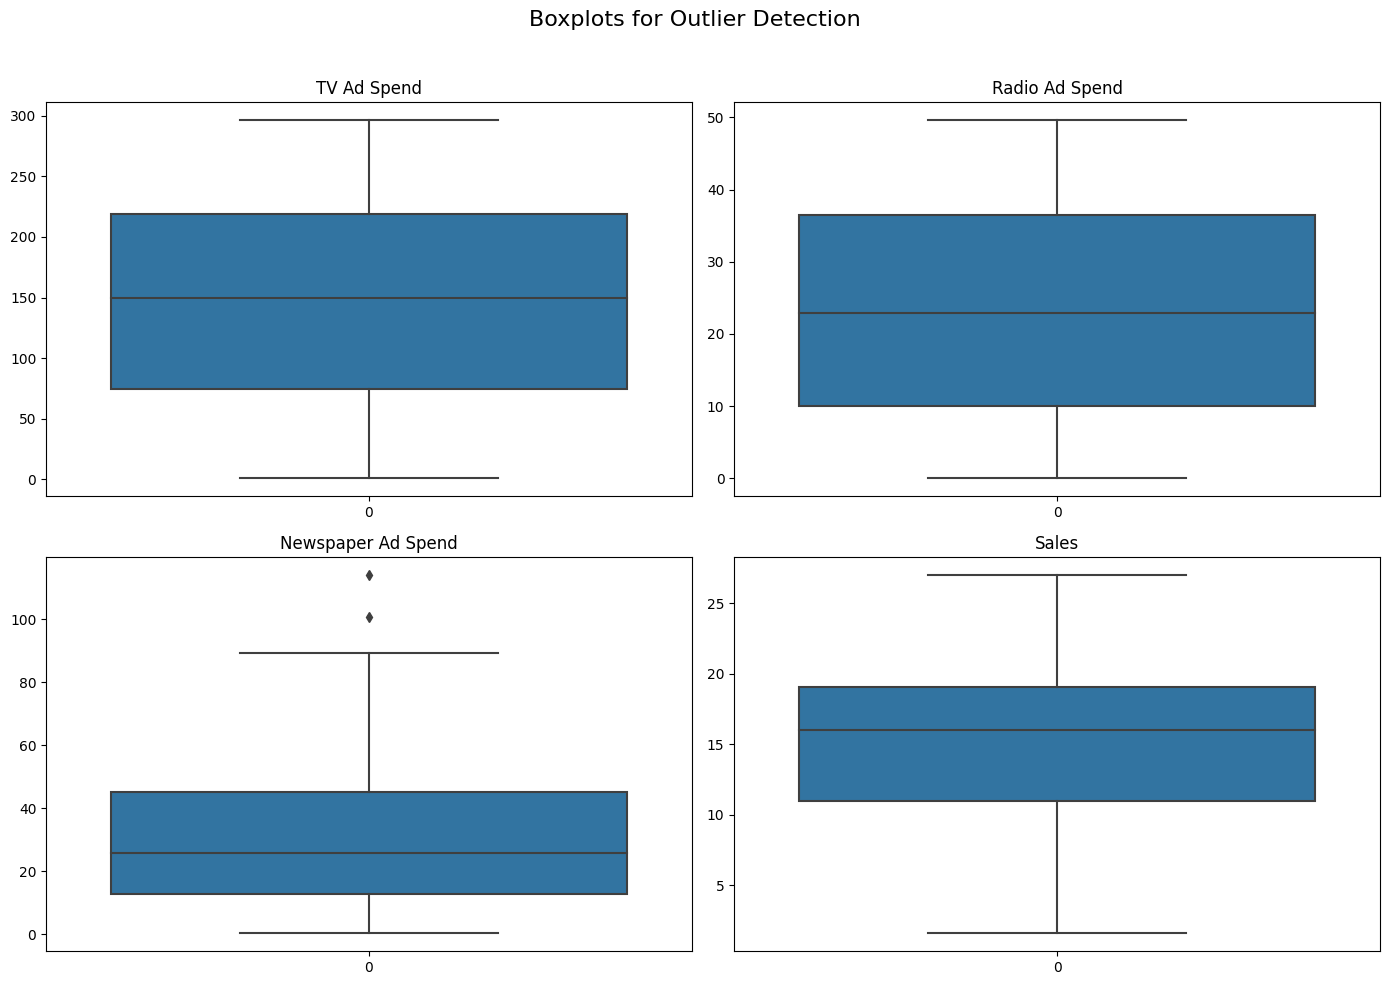

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16)

# Boxplots for each variable
sns.boxplot(data=data['TV'], ax=axes[0, 0]).set_title('TV Ad Spend')
sns.boxplot(data=data['Radio'], ax=axes[0, 1]).set_title('Radio Ad Spend')
sns.boxplot(data=data['Newspaper'], ax=axes[1, 0]).set_title('Newspaper Ad Spend')
sns.boxplot(data=data['Sales'], ax=axes[1, 1]).set_title('Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# TV Ad Spend: A few campaigns have significantly higher TV spending, hinting at 
# potential outliers.
# Radio Ad Spend: There are fewer extreme values, but a few outliers appear above 
# 40 units of spending.
# Newspaper Ad Spend: Wide variability with several outliers, reflecting 
# inconsistency in newspaper advertising strategies.
# Sales: No extreme outliers are observed, but there is a healthy spread in 
# sales performance.

### Pairplot to observe relationships between all variables

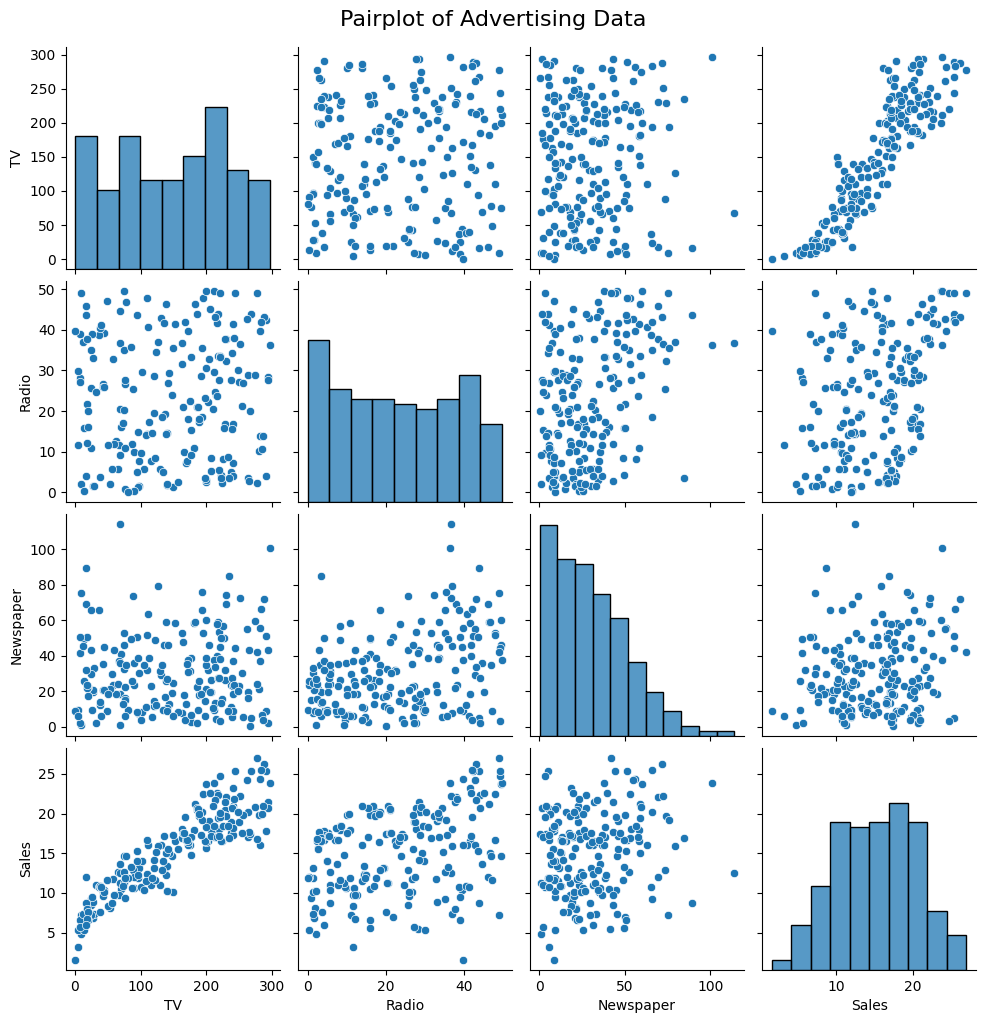

In [21]:
sns.pairplot(data, height=2.5)
plt.suptitle('Pairplot of Advertising Data', y=1.02, fontsize=16)
plt.show()

In [ ]:
# The pairplot confirms the earlier correlation findings. It shows a strong positive relationship between TV ad spending and sales, while radio and newspaper spending exhibit weaker correlations with sales.
# The scatter plots for different pairs of variables indicate that spending across platforms is generally independent.

### Trend of spending across platforms

<Figure size 1400x600 with 0 Axes>

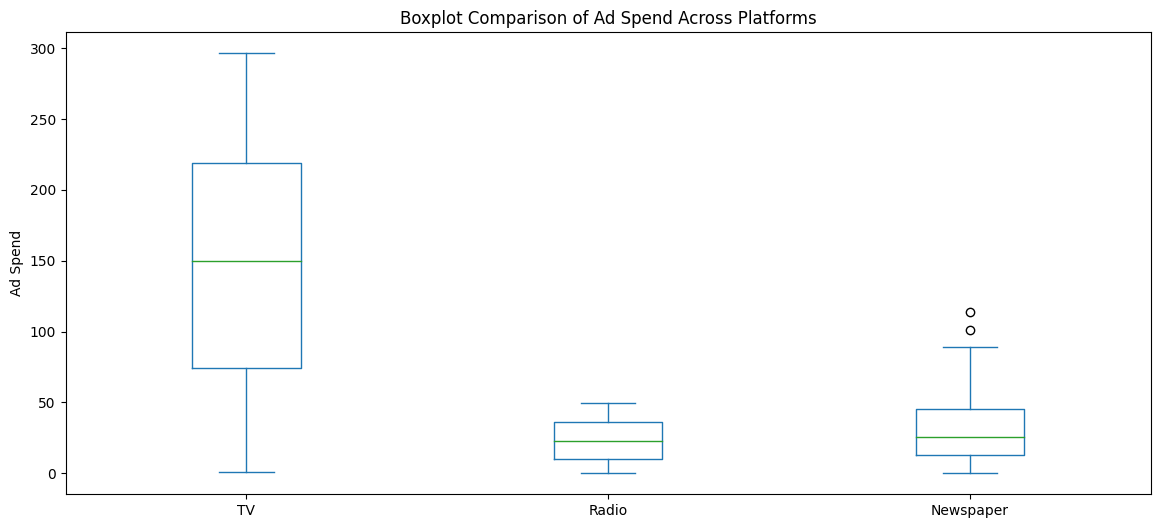

In [22]:
plt.figure(figsize=(14, 6))
data[['TV', 'Radio', 'Newspaper']].plot(kind='box', figsize=(14, 6))
plt.title('Boxplot Comparison of Ad Spend Across Platforms')
plt.ylabel('Ad Spend')
plt.show()

In [23]:
# TV ad spending has the highest average and variability among the platforms, 
# indicating it might be the primary channel for campaigns.
# Radio ad spending appears more consistent, with most values clustered around 
# a median level.
# Newspaper spending is more varied, reflecting campaigns with both minimal and 
# substantial investments.

### Violin plots to observe the distribution and density of spending and sales

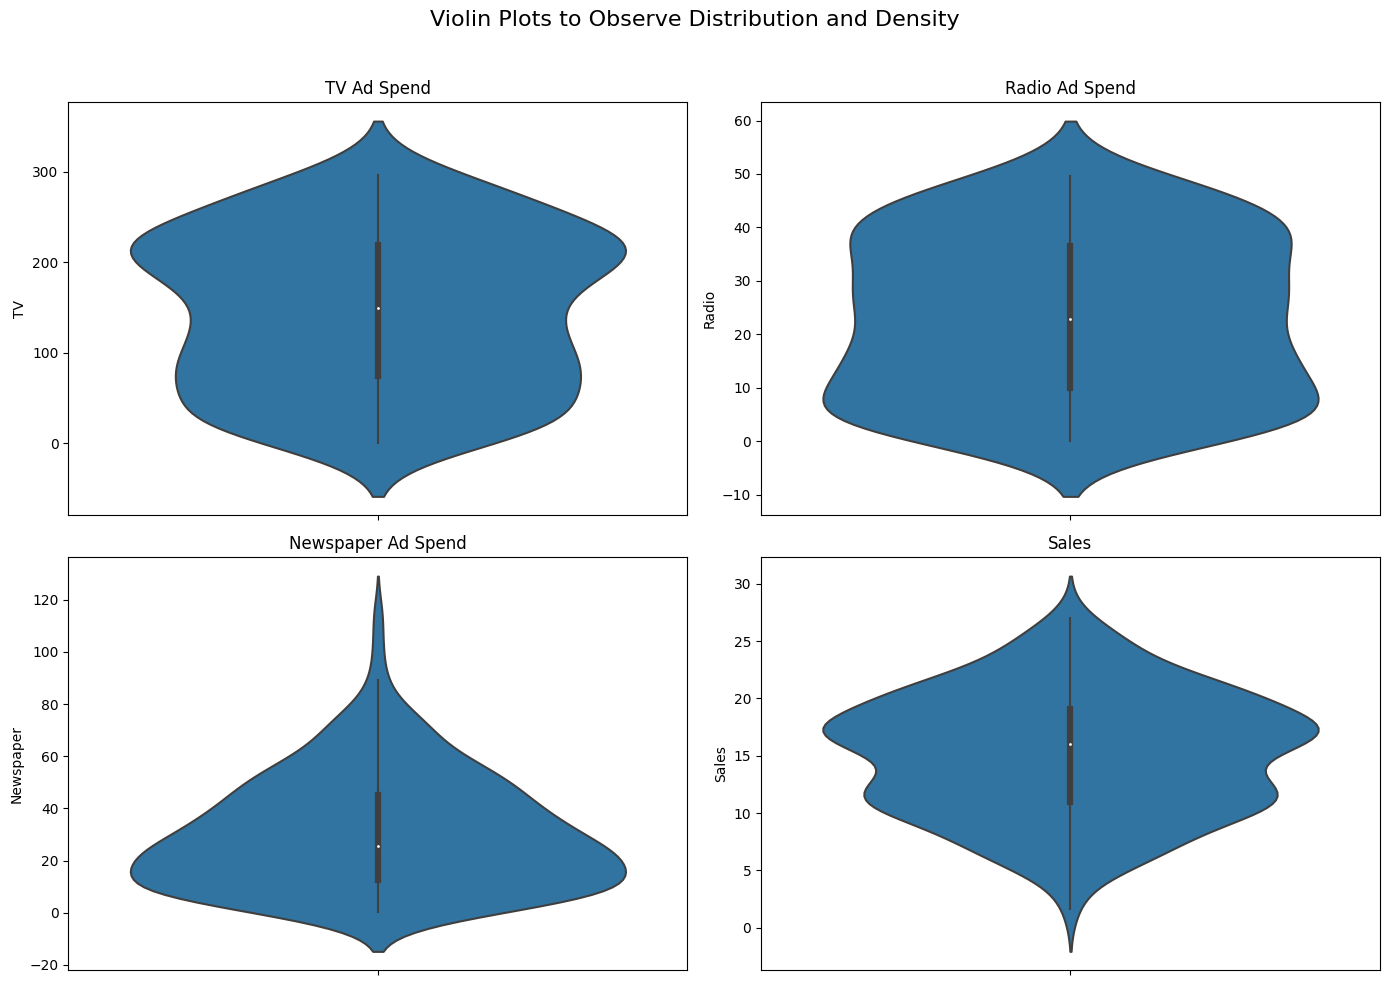

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Violin Plots to Observe Distribution and Density', fontsize=16)

# Violin plot for each variable
sns.violinplot(data=data, y='TV', ax=axes[0, 0]).set_title('TV Ad Spend')
sns.violinplot(data=data, y='Radio', ax=axes[0, 1]).set_title('Radio Ad Spend')
sns.violinplot(data=data, y='Newspaper', ax=axes[1, 0]).set_title('Newspaper Ad Spend')
sns.violinplot(data=data, y='Sales', ax=axes[1, 1]).set_title('Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [25]:
# TV Ad Spend: The distribution is fairly spread with higher density around 150 units, 
# and some extreme values indicate higher spending outliers.
# Radio Ad Spend: A more balanced distribution with a concentration around the median 
# and some variability near the higher end.
# Newspaper Ad Spend: Displays a wide spread, confirming that campaigns have 
# inconsistent spending patterns for newspapers.
# Sales: Sales values are concentrated between 10 and 20 units, with some outliers 
# at the high end.

### Cumulative spending trends over campaigns

<Figure size 1400x600 with 0 Axes>

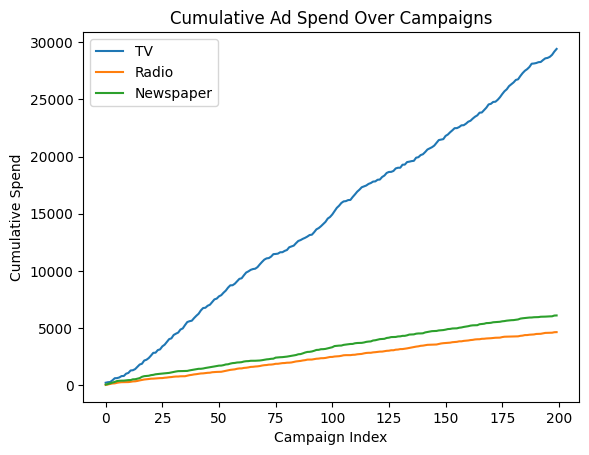

In [27]:
cumulative_spend = data[['TV', 'Radio', 'Newspaper']].cumsum()
plt.figure(figsize=(14, 6))
cumulative_spend.plot(title='Cumulative Ad Spend Over Campaigns', xlabel='Campaign Index', ylabel='Cumulative Spend')
plt.show()


In [28]:
# This line plot shows the cumulative spending on TV, Radio, and Newspaper 
# advertising over time (campaign index).
# TV spending grows the fastest, suggesting it is the primary focus across campaigns.
# Radio and Newspaper show slower growth, with Newspaper being the least 
# invested platform.

### Bivariate relationships with distribution

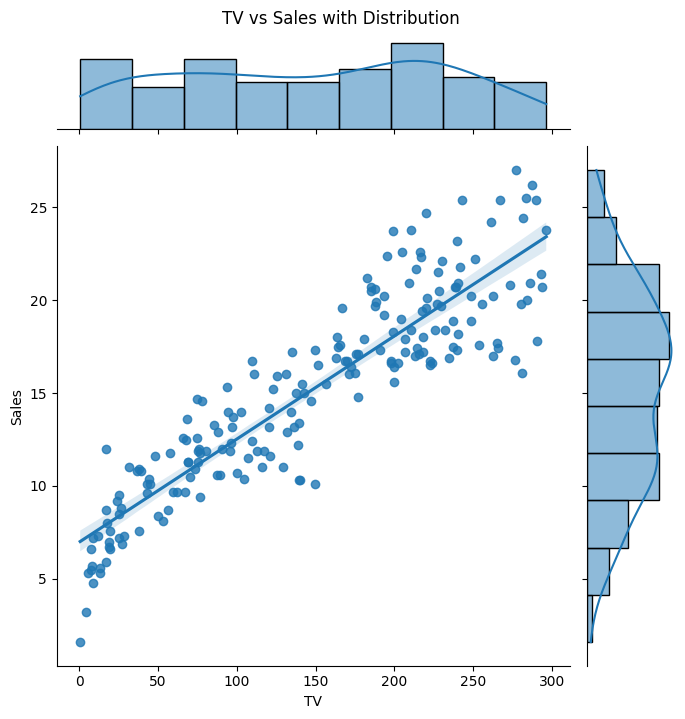

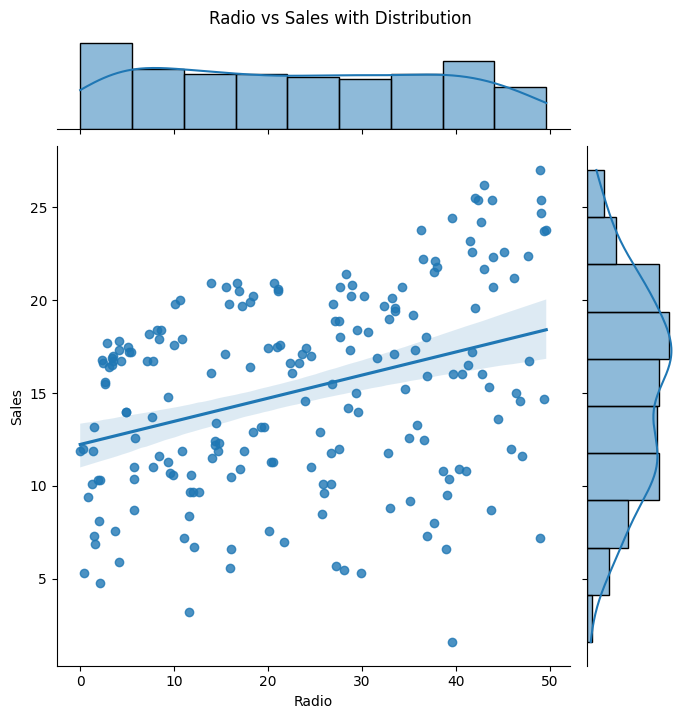

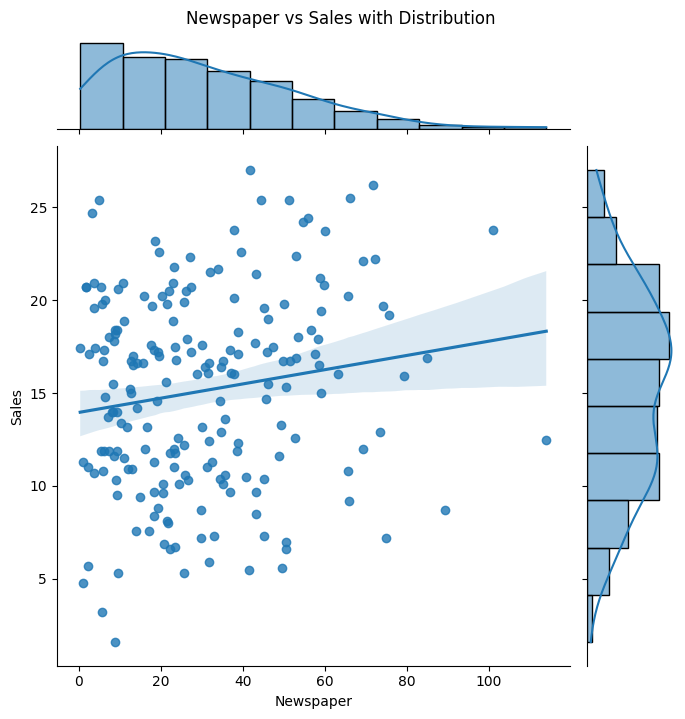

In [29]:
sns.jointplot(data=data, x='TV', y='Sales', kind='reg', height=7)
plt.suptitle('TV vs Sales with Distribution', y=1.02)

sns.jointplot(data=data, x='Radio', y='Sales', kind='reg', height=7)
plt.suptitle('Radio vs Sales with Distribution', y=1.02)

sns.jointplot(data=data, x='Newspaper', y='Sales', kind='reg', height=7)
plt.suptitle('Newspaper vs Sales with Distribution', y=1.02)

plt.show()


In [30]:
# TV vs Sales: A clear positive linear relationship with a tight distribution, 
#     confirming TV's significant influence on sales.
# Radio vs Sales: The positive trend is weaker, with more scattered points reflecting 
#     variability.
# Newspaper vs Sales: No strong trend, confirming the weak correlation observed earlier 
#     between Newspaper spending and sales.

### Residual plots for all advertising channels vs Sales

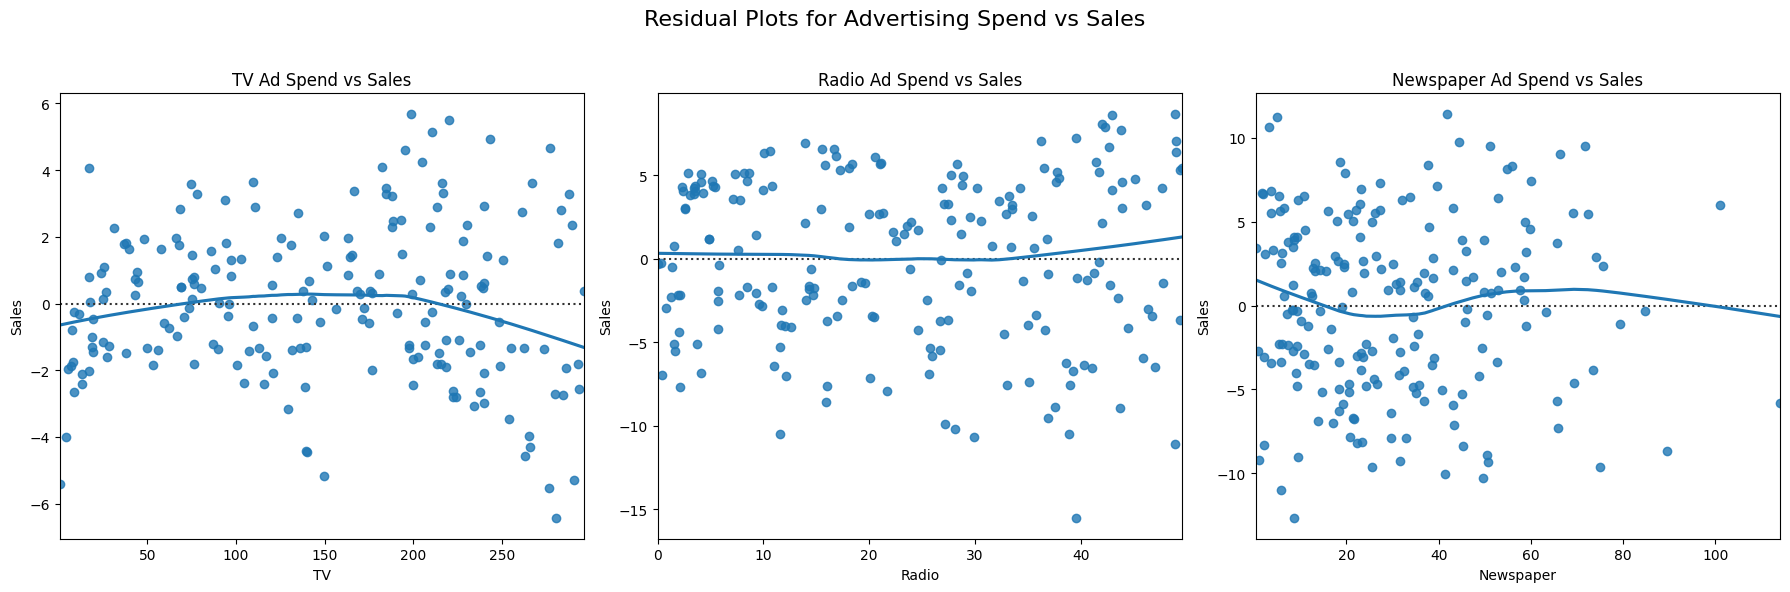

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Residual Plots for Advertising Spend vs Sales', fontsize=16)

# Residual plot for TV
sns.residplot(data=data, x='TV', y='Sales', lowess=True, ax=axes[0])
axes[0].set_title('TV Ad Spend vs Sales')

# Residual plot for Radio
sns.residplot(data=data, x='Radio', y='Sales', lowess=True, ax=axes[1])
axes[1].set_title('Radio Ad Spend vs Sales')

# Residual plot for Newspaper
sns.residplot(data=data, x='Newspaper', y='Sales', lowess=True, ax=axes[2])
axes[2].set_title('Newspaper Ad Spend vs Sales')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [32]:
# TV vs Sales: The residuals are fairly evenly distributed around zero, suggesting 
# a good linear relationship between TV ad spend and sales.
# Radio vs Sales: There is some spread in the residuals, indicating variability, 
# meaning not all changes in radio spending lead to proportional changes in sales.
# Newspaper vs Sales: The residuals show no clear pattern, confirming that newspaper 
# ad spend does not have a strong linear relationship with sales.

### Average advertising spend

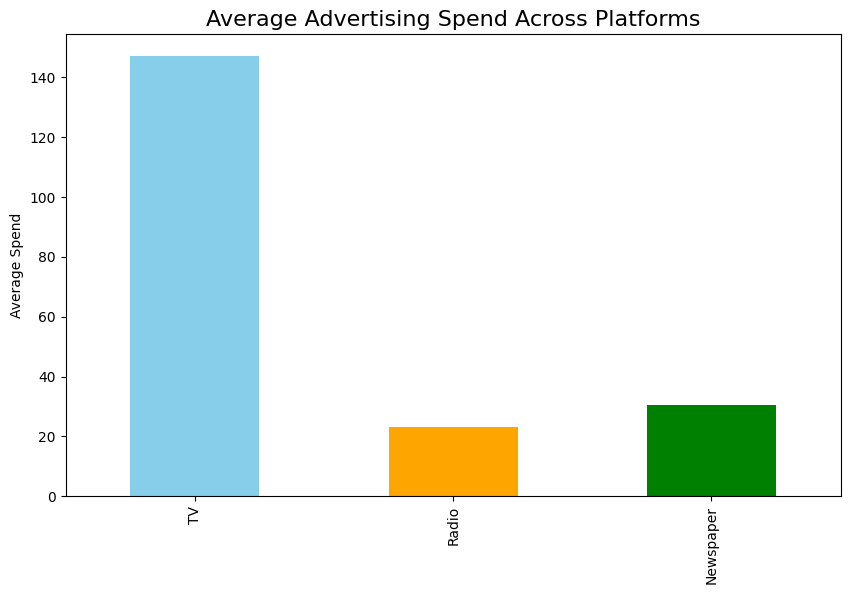

In [34]:
avg_spend = data[['TV', 'Radio', 'Newspaper']].mean()

plt.figure(figsize=(10, 6))
avg_spend.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Average Advertising Spend Across Platforms', fontsize=16)
plt.ylabel('Average Spend')
plt.show()


In [35]:
# TV advertising receives the highest average investment, followed by Newspaper, 
# with Radio being the least invested platform. This aligns with the earlier 
# finding that TV advertising has the strongest relationship with sales.

# Data Pre-processing

### Checking for missing values

In [36]:
missing_values = data.isnull().sum()

In [37]:
missing_values

TV                   0
Radio                0
Newspaper            0
Sales                0
Sales_Rolling_Avg    9
dtype: int64

In [ ]:
# The only missing values are found in the Sales_Rolling_Avg column, which 
# is an optional feature created during our earlier EDA. All other columns are 
# free from missing values.

### Checking for duplicate rows

In [38]:
duplicate_rows = data.duplicated().sum()

In [39]:
duplicate_rows

0

In [40]:
# No duplicate rows were found in the dataset.

### Handling outliers using the IQR method

In [45]:
Q1 = data[['TV', 'Radio', 'Newspaper', 'Sales']].quantile(0.25)
Q3 = data[['TV', 'Radio', 'Newspaper', 'Sales']].quantile(0.75)
IQR = Q3 - Q1

# Aligning DataFrame to perform comparison correctly
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers by ensuring proper alignment
data_cleaned = data[~((data[['TV', 'Radio', 'Newspaper', 'Sales']] < lower_bound) |
                      (data[['TV', 'Radio', 'Newspaper', 'Sales']] > upper_bound)).any(axis=1)]



In [50]:
data_cleaned.shape

(198, 5)

In [51]:
# 198 observations remain after outlier removal.

### Normalizing the data using Min-Max Scaling

In [48]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cleaned[['TV', 'Radio', 'Newspaper', 'Sales']])

In [49]:
# Converting scaled data back to DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=['TV', 'Radio', 'Newspaper', 'Sales'])


In [52]:
data_scaled.head()

,TV,Radio,Newspaper,Sales
0,0.783202,0.762097,0.773288,0.807087
1,0.149539,0.792339,0.502806,0.346457
2,0.056333,0.925403,0.774411,0.409449
3,0.514851,0.832661,0.653199,0.586614
4,0.614886,0.217742,0.652076,0.641732


In [55]:
X = data_scaled[['TV', 'Radio', 'Newspaper']]
y = data_scaled['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODELLING

## Linear Regression

In [57]:
# Define the model
model = LinearRegression()

# Set up the hyperparameter grid
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# Run GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [58]:
# Get the best model
best_model = grid_search.best_estimator_

In [59]:
best_model

LinearRegression()

In [60]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [61]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Best Parameters: {'copy_X': True, 'fit_intercept': True}
R2 Score: 0.9151626818586048
MSE: 0.0037987041396503334
RMSE: 0.0616336283180727
MAE: 0.04788137884068524


In [ ]:
# Best Parameters: Includes intercept and preserves original data (copy_X=True, fit_intercept=True).
# R² Score (0.915): Model explains 91.5% of the variance in sales, indicating a strong fit.
# MSE (0.0038), RMSE (0.0616), MAE (0.0479): The predictions are very close to actual sales, with minimal 
# average errors (~0.048 units).
# Conclusion:
# The model performs well, accurately capturing the relationship between ad spending and sales, 
# making it effective for forecasting and budgeting decisions.

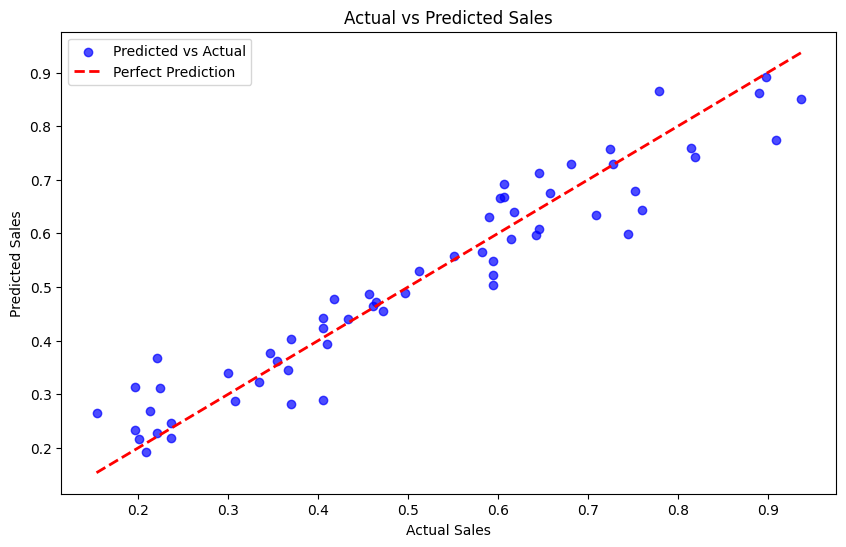

In [62]:
# Import necessary library
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')  # Reference line (y=x)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


### Decision Tree Regressor

In [65]:
# Defining the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)


In [66]:
# Setting up the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
# Running GridSearchCV with 5-Fold Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [68]:
# Extracting the best model from GridSearch
best_model = grid_search.best_estimator_

In [69]:
# Making predictions on the test set
y_pred = best_model.predict(X_test)


In [70]:
# Calculating evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [71]:
# Displaying the results
grid_search.best_params_, r2, mse, rmse, mae

({'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2},
 0.9076200521113841,
 0.004136435452618805,
 0.06431512615721752,
 0.054396505361072274)

In [ ]:
# Best Parameters:
# max_depth=5: Limits the depth of the tree to avoid overfitting.
# min_samples_leaf=2: Each leaf node must have at least 2 samples, promoting generalization.
# min_samples_split=2: A node splits if it contains at least 2 samples, ensuring sufficient data for
# meaningful splits.
# R² Score (0.908):
# The model explains 90.8% of the variance in sales, indicating a strong fit, though slightly less than the
# Linear Regression model (91.5%).
# MSE (0.0041):
# This is the average squared error, indicating that the predictions are very close to the actual values.
# RMSE (0.0643):
# On average, predictions deviate from actual sales by 0.064 units, slightly more than in the Linear
# Regression model.
# MAE (0.0544):
# The average absolute error is 0.054 units, reflecting a minimal deviation from actual values.
# Conclusion:
# The Decision Tree Regressor performs well with an R² of 90.8%.

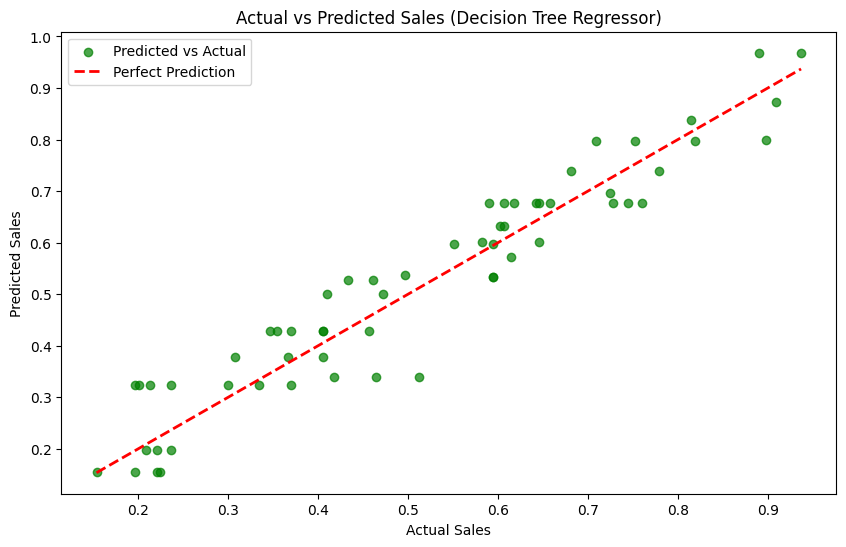

In [72]:
# Plotting Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Decision Tree Regressor)')
plt.legend()
plt.show()

# COMPARISION

In [73]:
from prettytable import PrettyTable

# Creating a table to compare Linear Regression and Decision Tree Regressor results
table = PrettyTable()
table.field_names = ["Metric", "Linear Regression", "Decision Tree Regressor"]

# Linear Regression Metrics (from earlier results)
lr_r2 = 0.9151626818586048
lr_mse = 0.0037987041396503334
lr_rmse = 0.0616336283180727
lr_mae = 0.04788137884068524

# Decision Tree Regressor Metrics (from provided results)
dt_r2 = 0.9076200521113841
dt_mse = 0.004136435452618805
dt_rmse = 0.06431512615721752
dt_mae = 0.054396505361072274

# Adding rows to the table
table.add_row(["R² Score", lr_r2, dt_r2])
table.add_row(["MSE", lr_mse, dt_mse])
table.add_row(["RMSE", lr_rmse, dt_rmse])
table.add_row(["MAE", lr_mae, dt_mae])

# Printing the comparison table
print(table)


+----------+-----------------------+-------------------------+
|  Metric  |   Linear Regression   | Decision Tree Regressor |
+----------+-----------------------+-------------------------+
| R² Score |   0.9151626818586048  |    0.9076200521113841   |
|   MSE    | 0.0037987041396503334 |   0.004136435452618805  |
|   RMSE   |   0.0616336283180727  |   0.06431512615721752   |
|   MAE    |  0.04788137884068524  |   0.054396505361072274  |
+----------+-----------------------+-------------------------+


In [ ]:
# Linear Regression performs slightly better with a higher R² score and lower error metrics.
# Decision Tree Regressor offers comparable performance but with slightly higher errors, indicating 
# some trade-offs between simplicity and flexibility.